In [0]:
from google.colab import files
import matplotlib.pyplot as plt
from scipy.linalg import circulant
import numpy as np
import time

from google.colab import drive
import cvxpy as cvx
import imageio

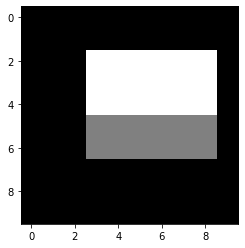

In [0]:
pic = np.zeros((10,10))
pic[2:7,3:9] = 1

pic[5:7, 3:9] = 0.5
plt.imshow(pic,'gray')

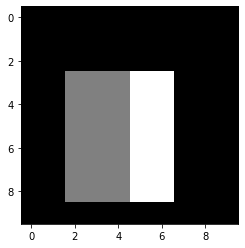

In [0]:

pic2 = np.zeros((10,10))
pic2[3:9,2:7] = 0.5

pic2[3:9, 5:7] = 1
plt.imshow(pic2,'gray')

In [2]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py -O mnist.py


--2020-04-02 01:14:45--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/35c067adcc1ab364c8803830cdb34d0d50eea37e/week01_backprop/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2.6K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   2.63K  --.-KB/s    in 0s      

2020-04-02 01:14:46 (29.6 MB/s) - ‘mnist.py’ saved [2697/2697]



In [0]:
import mnist

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset(flatten=True)

In [0]:
pic = X_train[0].reshape([28,28])
pic2 = X_train[1].reshape([28,28])

In [0]:
K = 10
L = 1500
N = 784

In [0]:

m1 = pic.reshape((N,1))
m2 = pic2.reshape((N,1))

In [0]:
C = np.random.randn(L,N)


h1 = np.random.randn(K,1)
h2 = np.random.randn(K,1)
h3 = np.random.randn(K,1)
h4 = np.random.randn(K,1)

B = np.random.randn(L,K)

In [0]:
A = circulant(C[:,0]) @ B
for iter in range(1,N):
    elem = circulant(C[:,iter]) @ B
    A = np.hstack((A,elem))

In [0]:

X11 = h1 @ m1.reshape((1,N))
X12 = h2 @ m1.reshape((1,N))

X1 = np.vstack((X11,X12))

X21 = h3 @ m2.reshape((1,N))
X22 = h4 @ m2.reshape((1,N))

X2 = np.vstack((X21,X22))

In [0]:
X = X1 + X2

In [0]:
a, b = A.shape
A0 = np.zeros((a,b))
A1 = np.hstack((A,A0))
A2 = np.hstack((A0,A))
A = np.vstack((A1,A2))

In [0]:

y =  A @ cvx.vec(X)

In [48]:
start = time.time()
W1 = cvx.Variable((2*K,2*K), symmetric=True)
W2 = cvx.Variable((N,N),  symmetric=True)
Z = cvx.Variable((2*K,N))

constraints = [cvx.bmat([[W1,Z],[Z.T,W2]]) >> 0,
               y == A @ cvx.vec(Z)]
obj = cvx.Minimize(1/2 * (cvx.trace(W1) + cvx.trace(W2)))
problem = cvx.Problem(obj, constraints)
problem.solve()
print(start - time.time())

-366.7073814868927


In [0]:
Xk = Z.value

In [0]:
u, s, v = np.linalg.svd(Xk)

In [51]:
s

array([4.75566282e+01, 2.59312252e+01, 1.19860328e+00, 1.07720549e+00,
       8.80097735e-01, 8.12512011e-01, 6.62237315e-01, 6.15970050e-01,
       5.94053137e-01, 4.92395669e-01, 4.49769425e-01, 4.14922267e-01,
       3.28988920e-01, 2.35380279e-01, 1.91801175e-01, 7.72707046e-02,
       6.46767430e-02, 4.84985751e-03, 4.55070105e-03, 4.51494397e-03])

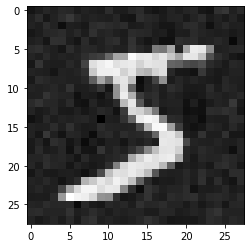

In [58]:
result = (v[0,:]-0.7*v[1,:]).reshape((28,28))
plt.imshow(result,'gray')

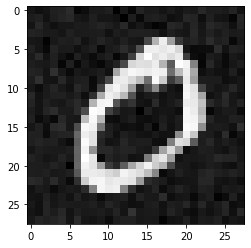

In [61]:
result = (v[1,:]+2*v[0,:]).reshape((28,28))
plt.imshow(result,'gray')

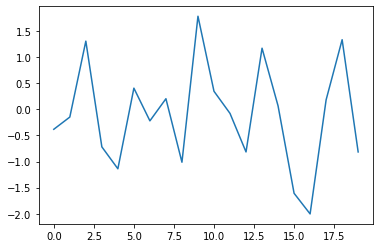

In [64]:
plt.plot(np.vstack((h3,h4)))

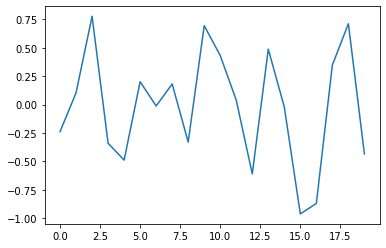

In [65]:
plt.plot(u[:,1]+2*u[:,0])

In [0]:
y = A @ X.reshape((2000,1))

In [0]:
np.linalg.norm(y - A @ Xk.reshape((2000,1)))

7.78561607647442

In [66]:
problem.status

'optimal'